In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier


In [2]:
def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data


ZADATAK 2

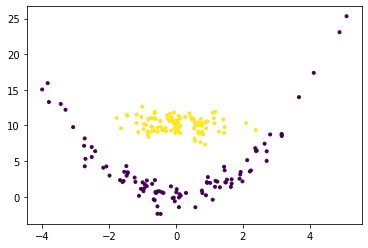

In [4]:

def plot_confusion_matrix(c_matrix):
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j) / float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center', color='green', size=20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])

    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()


np.random.seed(242)
learning_Set = generate_data(200)
np.random.seed(12)
test_Set = generate_data(100)

plt.figure()
plt.scatter(learning_Set[:, 0], learning_Set[:, 1], marker='.', c=learning_Set[:, 2])

plt.show()


ZADATAK 3

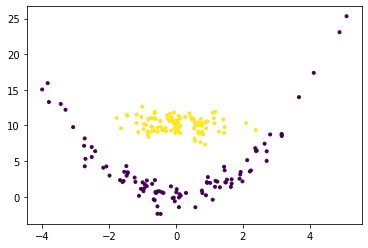

[-3.38987741] [[-0.05674024  0.45998177]]


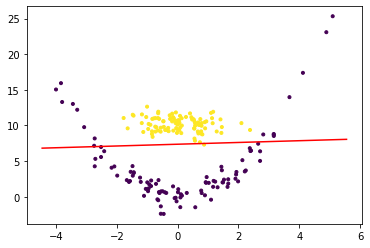

In [5]:
plt.figure()
plt.scatter(learning_Set[:, 0], learning_Set[:, 1], marker='.', c=learning_Set[:, 2])

plt.show()

logisticRegr = LogisticRegression()

logisticReg_output = logisticRegr.fit(learning_Set[:, :2], learning_Set[:, 2])
theta0 = logisticReg_output.intercept_
theta1 = logisticReg_output.coef_
print(theta0, theta1)

plt.figure()
plt.scatter(learning_Set[:, 0], learning_Set[:, 1], marker='.', c=learning_Set[:, 2])
ax = plt.gca()
x1 = np.array(ax.get_xlim())
x2 = -(theta0 + theta1[0][0] * x1) / theta1[0][1]
plt.plot(x1, x2, c="r")



ZADATAK 4

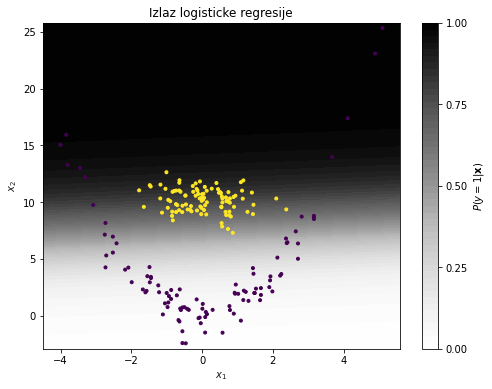

In [6]:
f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(learning_Set[:, 0]) - 0.5:max(learning_Set[:, 0]) + 0.5:.05,
                 min(learning_Set[:, 1]) - 0.5:max(learning_Set[:, 1]) + 0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
probs = logisticReg_output.predict_proba(grid)[:, 1].reshape(x_grid.shape)

cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)
plt.scatter(learning_Set[:, 0], learning_Set[:, 1], marker='.', c=learning_Set[:, 2])
ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.show()


ZADATAK 5

[1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 1. 0.]


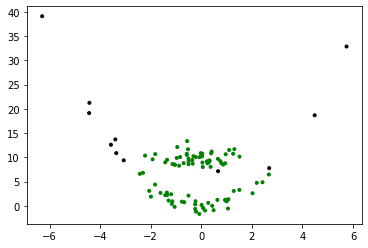

In [7]:
LogRegPredict = logisticRegr.predict(test_Set[:, :2])  # radi predvidjanje modela
print(LogRegPredict)
test_sample = test_Set[:, 2]
test_colormap = ['g' if LogRegPredict[i] == test_sample[i] else 'k'
                 for i in range(len(LogRegPredict))]
plt.scatter(test_Set[:, 0], test_Set[:, 1], marker='.', c=test_colormap)


ZADATAK 6

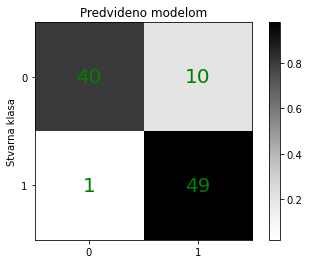

Accuracy =  0.89
Missclarification rate =  0.10999999999999999
Precision =  0.8305084745762712
Recall =  0.98
49 10 1 40
Specificity =  0.8305084745762712


In [8]:
confusionMatrix = confusion_matrix(test_sample, LogRegPredict)
plot_confusion_matrix(confusionMatrix)
yTrue = test_Set[:, 2]
yPredicted = LogRegPredict
accuracy = accuracy_score(yTrue, yPredicted)
print("Accuracy = ", accuracy)
print("Missclarification rate = ", 1 - accuracy)
precision = precision_score(yTrue, yPredicted)
print("Precision = ", precision)
recall = recall_score(yTrue, yPredicted)
print("Recall = ", recall)
tp, fp, fn, tn = confusionMatrix.ravel()
print(tn, fp, fn, tp)
specificity = tn / (tn + fp)
print("Specificity = ", specificity)
